In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
data=pd.read_csv("Unemployment in India.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
data.shape

(768, 7)

In [100]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [101]:
data.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [103]:
data['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [104]:
data.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [105]:
dataset=data.dropna()

In [106]:
dataset.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [107]:
dataset.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [112]:
dataset.loc[:,'Date'] = pd.to_datetime(dataset['Date'])

In [113]:
dataset.loc[:,'Year']=dataset['Date'].dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_11756\151091818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:,'Year']=dataset['Date'].dt.year


In [114]:
dataset

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019
...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,2020


In [115]:
dataset['Frequency'].value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [116]:
dataset.loc[:,'Frequency']=dataset['Frequency'].str.strip()

In [117]:
dataset['Frequency'].value_counts()

Frequency
Monthly    740
Name: count, dtype: int64

In [118]:
dataset['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

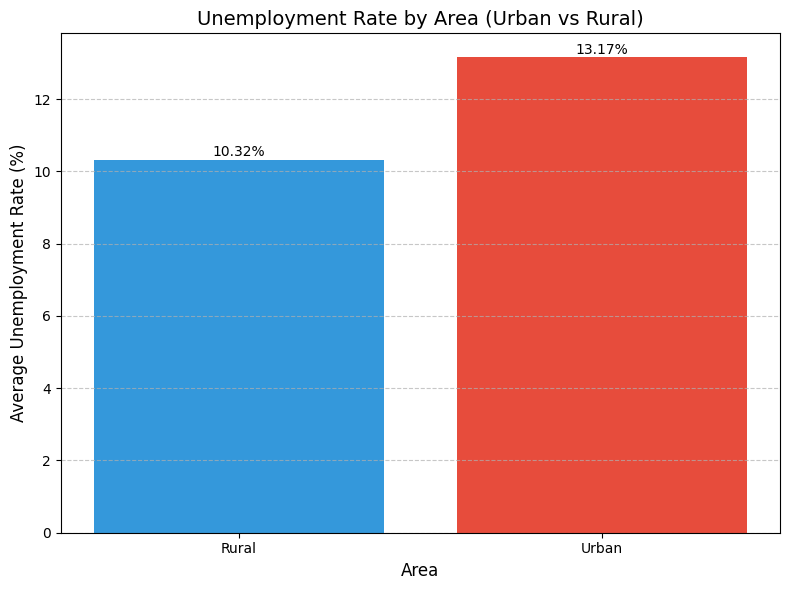

In [ ]:
area_unemployment = dataset.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

# Tracer le graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(area_unemployment.index, area_unemployment.values, color=['#3498db', '#e74c3c'])

# Ajouter des labels et un titre
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate by Area (Urban vs Rural)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter des valeurs au-dessus des barres
for i, value in enumerate(area_unemployment.values):
    plt.text(i, value + 0.1, f'{value:.2f}%', ha='center', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()

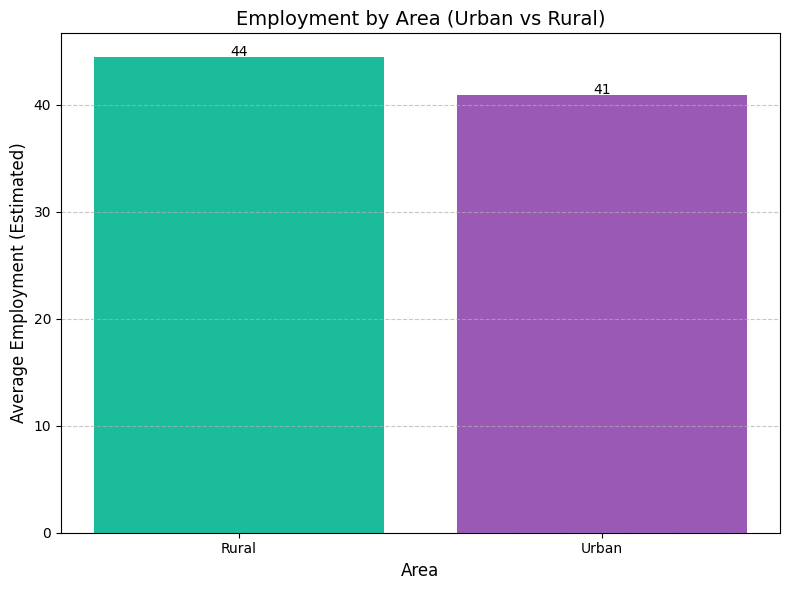

In [153]:
# Calculer le taux d'emploi moyen par zone
area_employment = dataset.groupby('Area')['Estimated Labour Participation Rate (%)'].mean()

# Tracer le graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(area_employment.index, area_employment.values, color=['#1abc9c', '#9b59b6'])

# Ajouter des labels et un titre
plt.xlabel('Area', fontsize=12)
plt.ylabel('Average Employment (Estimated)', fontsize=12)
plt.title('Employment by Area (Urban vs Rural)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter des valeurs au-dessus des barres
for i, value in enumerate(area_employment.values):
    plt.text(i, value + 0.1, f'{value:,.0f}', ha='center', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


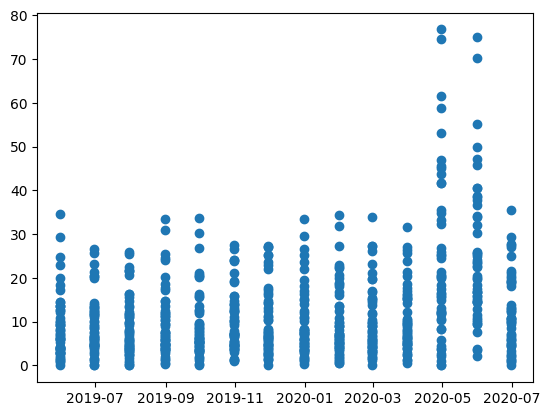

In [165]:
plt.scatter(dataset['Date'],dataset['Estimated Unemployment Rate (%)'])
plt.show()